# SHAP prediction from Key Indicators using "statsmodels" package

Do the linear regression using "statsmodels".

In [1]:
import os
import pandas as pd
import numpy as np  # for NaN
import statsmodels.api as sm

In [2]:
from scipy.stats import pearsonr

In [3]:
import matplotlib.pyplot as plt

In [4]:
from sklearn.linear_model import LinearRegression

In [5]:
from sklearn.linear_model import LogisticRegression
from scipy.special import expit

### Import data

In [6]:
dir_files = '../data/organisational_audit/processed'
file_excel = 'processed_2019_portfolio_key_indicators_summary_numeric_shap.csv'

In [7]:
df = pd.read_csv(os.path.join(dir_files, file_excel))

In [8]:
df.columns

Index(['Hospital names', 'acute_unit', 'bed1', 'bed3', 'ki_total', 'ki1',
       'ki1_nurses6_wte', 'ki1_nurses7_wte', 'ki2', 'ki2_psych_wte', 'ki3',
       'ki3_strokenurse_outofhours', 'ki4',
       'ki4_minimum_nurse_bed1_saturdays10am',
       'ki4_minimum_nurse_bed1_sundays10am',
       'ki4_minimum_nurse_bed3_saturdays10am',
       'ki4_minimum_nurse_bed3_sundays10am', 'ki5',
       'ki5_occupationaltherapy_7days', 'ki5_physiotherapy_7days',
       'ki5_speechlanguagetherapy_7days', 'ki6', 'ki6_prealert_consultant',
       'ki6_prealert_fastpositive_sometimes', 'ki6_prealert_fastpositive_yes',
       'ki6_prealert_ivtcandidates_sometimes',
       'ki6_prealert_ivtcandidates_yes', 'ki6_prealert_juniordoctor',
       'ki6_prealert_othersuspectedstroke_sometimes',
       'ki6_prealert_othersuspectedstroke_yes', 'ki6_prealert_strokenurse',
       'ki7', 'ki7_percent_access_to_stroke_esd_team', 'ki7_stroke_esd_team',
       'ki8', 'ki8_patientcarersurvey_frequency_1to2peryear',
      

## Correlation

## Linear regression

In [9]:
x = df['ki_total'].values

In [10]:
y = df['shap_mean'].values

In [11]:
model = sm.OLS(y, x)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.005
Method:                 Least Squares   F-statistic:                             0.4325
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                       0.512
Time:                        12:24:39   Log-Likelihood:                         -78.105
No. Observations:                 116   AIC:                                      158.2
Df Residuals:                     115   BIC:                                      161.0
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [12]:
# dir(results)

In [13]:
print("Parameters: ", results.params)
print("R2: ", results.rsquared)

Parameters:  [0.00561101]
R2:  0.0037466703341928476


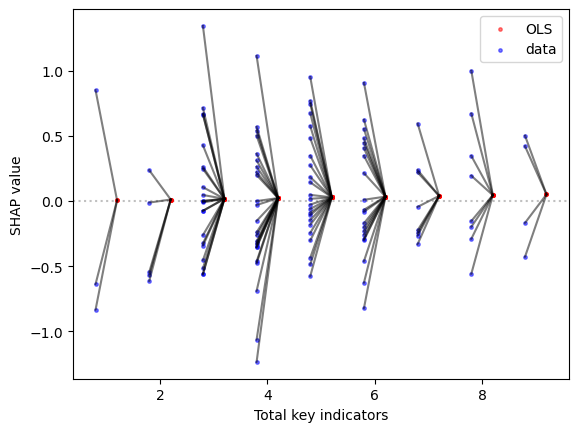

In [14]:
fig, ax = plt.subplots()

x_offset = 0.2

ax.scatter(x + x_offset, results.fittedvalues, label="OLS", s=6, color='r', alpha=0.5)
ax.scatter(x - x_offset, y, label="data", s=6, color='b', alpha=0.5)

ax.plot(
    np.array([x - x_offset, x + x_offset]),
    np.array([y, results.fittedvalues]),
    color='k', alpha=0.5, zorder=1
)

ax.axhline(0.0, color='silver', zorder=0, linestyle=':')

ax.set_xlabel('Total key indicators')
ax.set_ylabel('SHAP value')
ax.legend()

plt.savefig('./images/statsmodels_totalki_vs_shap_data_vs_predicted_ols.png', bbox_inches='tight')
plt.show()

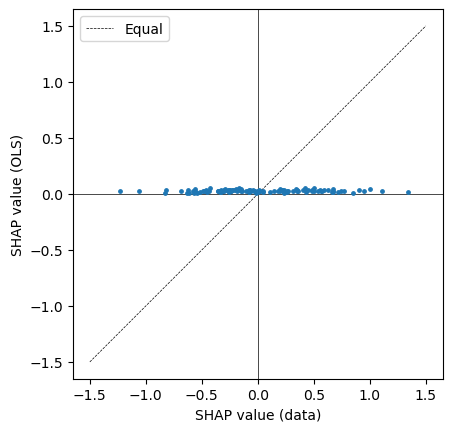

In [15]:
fig, ax = plt.subplots()

ax.axhline(0.0, color='k', zorder=0, linewidth=0.5)
ax.axvline(0.0, color='k', zorder=0, linewidth=0.5)

ax.scatter(y, results.fittedvalues, s=6)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.plot([-1.5, 1.5], [-1.5, 1.5], color='k', linestyle='--', label='Equal', zorder=0, linewidth=0.5)

# ax.set_xlim(xlim)
# ax.set_ylim(ylim)

ax.set_xlabel('SHAP value (data)')
ax.set_ylabel('SHAP value (OLS)')

ax.legend()
ax.set_aspect('equal')


plt.savefig('./images/statsmodels_totalki_scatter_shap_data_vs_predicted_ols.png', bbox_inches='tight')
plt.show()

This model basically just predicts that everything will have a SHAP value of zeroish. This is probably because there's no real link between the total key indicators met and the SHAP values, so on average it's correct because half the teams are predicted too low a SHAP and half are predicted too high.

## Separate key indicators

In [16]:
ki_cols = [f'ki{i}' for i in range(1, 11)]

In [17]:
x_all = df[ki_cols].values

In [18]:
y = df['shap_mean'].values

In [19]:
model = sm.OLS(y, x_all)
results = model.fit()
print(results.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.140
Model:                            OLS   Adj. R-squared (uncentered):              0.059
Method:                 Least Squares   F-statistic:                              1.724
Date:                Tue, 23 Apr 2024   Prob (F-statistic):                      0.0845
Time:                        12:24:40   Log-Likelihood:                         -69.581
No. Observations:                 116   AIC:                                      159.2
Df Residuals:                     106   BIC:                                      186.7
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

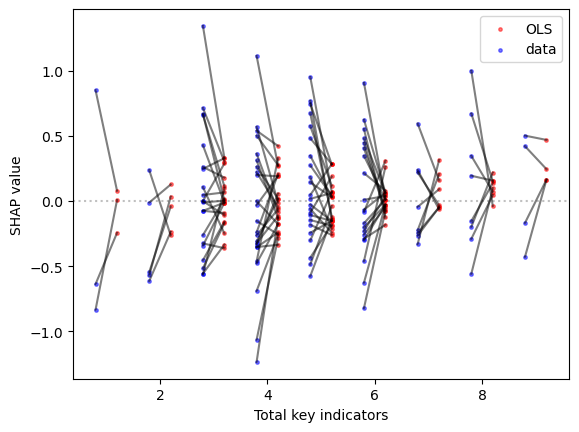

In [20]:
fig, ax = plt.subplots()

x_offset = 0.2

ax.scatter(df['ki_total'].values + x_offset, results.fittedvalues, label="OLS", s=6, color='r', alpha=0.5)
ax.scatter(df['ki_total'].values - x_offset, y, label="data", s=6, color='b', alpha=0.5)

ax.plot(
    np.array([df['ki_total'].values - x_offset, df['ki_total'].values + x_offset]),
    np.array([y, results.fittedvalues]),
    color='k', alpha=0.5, zorder=1
)

ax.axhline(0.0, color='silver', zorder=0, linestyle=':')

ax.set_xlabel('Total key indicators')
ax.set_ylabel('SHAP value')

ax.legend()

plt.savefig('./images/statsmodels_eachki_vs_shap_data_vs_predicted_ols.png', bbox_inches='tight')
plt.show()

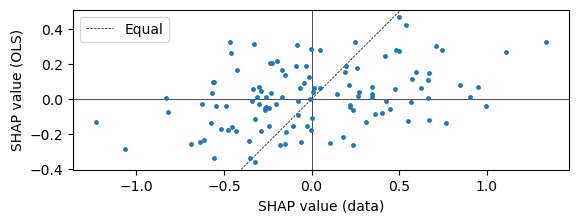

In [21]:
fig, ax = plt.subplots()

ax.axhline(0.0, color='k', zorder=0, linewidth=0.5)
ax.axvline(0.0, color='k', zorder=0, linewidth=0.5)

ax.scatter(y, results.fittedvalues, s=6)
xlim = ax.get_xlim()
ylim = ax.get_ylim()

ax.plot([-1.5, 1.5], [-1.5, 1.5], color='k', linestyle='--', label='Equal', zorder=0, linewidth=0.5)

ax.set_xlim(xlim)
ax.set_ylim(ylim)

ax.set_xlabel('SHAP value (data)')
ax.set_ylabel('SHAP value (OLS)')

ax.legend()
ax.set_aspect('equal')

plt.savefig('./images/statsmodels_eachki_scatter_shap_data_vs_predicted_ols.png', bbox_inches='tight')
plt.show()

Fitting each key indicator separately removes the effect of always predicting zero but still doesn't work too well. There's not much link between when the real data is positive and the predicted values are also positive. There seems to be no correlation between the predicted values.

In [22]:
from scipy.stats import pearsonr

In [23]:
pearsonr(y, results.fittedvalues)

PearsonRResult(statistic=0.37350554102574157, pvalue=3.632454626513975e-05)